# Test Kepribadian OCEAN

## Import modules

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings('ignore')

In [2]:
df_asli = pd.read_csv('dataset/data-final.csv', delimiter='\t')
df_asli.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,dateload,screenw,screenh,introelapse,testelapse,endelapse,IPC,country,lat_appx_lots_of_err,long_appx_lots_of_err
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,...,2016-03-03 02:01:01,768.0,1024.0,9.0,234.0,6,1,GB,51.5448,0.1991
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,...,2016-03-03 02:01:20,1360.0,768.0,12.0,179.0,11,1,MY,3.1698,101.706
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,...,2016-03-03 02:01:56,1366.0,768.0,3.0,186.0,7,1,GB,54.9119,-1.3833
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,...,2016-03-03 02:02:02,1920.0,1200.0,186.0,219.0,7,1,GB,51.75,-1.25
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,...,2016-03-03 02:02:57,1366.0,768.0,8.0,315.0,17,2,KE,1.0,38.0


## Data Preprocessing

In [3]:
df = df_asli.copy()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1015341 entries, 0 to 1015340
Columns: 110 entries, EXT1 to long_appx_lots_of_err
dtypes: float64(104), int64(2), object(4)
memory usage: 852.1+ MB


In [5]:
df.drop(df.columns[50:149], axis=1, inplace=True) # Menyeleksi kolom pertanyaan 

In [6]:
print("Jumlah peserta test:", len(df))

Jumlah peserta test: 1015341


In [7]:
print("Data hilang:", df.isnull().values.any())
print("Banyak data hilang:", df.isnull().values.sum())

print("\n")
print("Menghilangkan nilai kosong...")
df.dropna(inplace=True)
print("\n")

print("Jumlah data setelah dibersihkan:", len(df))

Data hilang: True
Banyak data hilang: 89150


Menghilangkan nilai kosong...


Jumlah data setelah dibersihkan: 1013558


In [8]:
X = df[df.columns[0:50]]

In [9]:
X

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,...,5.0,1.0,4.0,1.0,4.0,1.0,5.0,3.0,4.0,5.0
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,...,1.0,2.0,4.0,2.0,3.0,1.0,4.0,2.0,5.0,3.0
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,...,5.0,1.0,2.0,1.0,4.0,2.0,5.0,3.0,4.0,4.0
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,...,4.0,2.0,5.0,2.0,3.0,1.0,4.0,4.0,3.0,3.0
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,...,5.0,1.0,5.0,1.0,5.0,1.0,5.0,3.0,5.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015336,4.0,2.0,4.0,3.0,4.0,3.0,3.0,3.0,3.0,3.0,...,2.0,2.0,4.0,3.0,4.0,2.0,4.0,2.0,2.0,4.0
1015337,4.0,3.0,4.0,3.0,3.0,3.0,4.0,4.0,3.0,3.0,...,4.0,1.0,5.0,1.0,5.0,1.0,3.0,4.0,5.0,4.0
1015338,4.0,2.0,4.0,3.0,5.0,1.0,4.0,2.0,4.0,4.0,...,5.0,1.0,5.0,1.0,4.0,1.0,5.0,5.0,4.0,5.0
1015339,2.0,4.0,3.0,4.0,2.0,2.0,1.0,4.0,2.0,4.0,...,5.0,2.0,4.0,2.0,3.0,2.0,4.0,5.0,5.0,3.0


In [10]:
df.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,...,5.0,1.0,4.0,1.0,4.0,1.0,5.0,3.0,4.0,5.0
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,...,1.0,2.0,4.0,2.0,3.0,1.0,4.0,2.0,5.0,3.0
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,...,5.0,1.0,2.0,1.0,4.0,2.0,5.0,3.0,4.0,4.0
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,...,4.0,2.0,5.0,2.0,3.0,1.0,4.0,4.0,3.0,3.0
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,...,5.0,1.0,5.0,1.0,5.0,1.0,5.0,3.0,5.0,5.0


In [11]:
df.replace([1.0, 2.0, 3.0, 4.0, 5.0], [-2.0, -1.0, 0.0, 1.0, 2.0], inplace=True)

In [12]:
# df = df_clean.copy()

In [13]:
df.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
0,1.0,-2.0,2.0,-1.0,2.0,-2.0,2.0,-1.0,1.0,-2.0,...,2.0,-2.0,1.0,-2.0,1.0,-2.0,2.0,0.0,1.0,2.0
1,0.0,2.0,0.0,1.0,0.0,0.0,-1.0,2.0,-2.0,2.0,...,-2.0,-1.0,1.0,-1.0,0.0,-2.0,1.0,-1.0,2.0,0.0
2,-1.0,0.0,1.0,1.0,0.0,-1.0,-2.0,0.0,-1.0,2.0,...,2.0,-2.0,-1.0,-2.0,1.0,-1.0,2.0,0.0,1.0,1.0
3,-1.0,-1.0,-1.0,0.0,1.0,-1.0,-1.0,1.0,-2.0,1.0,...,1.0,-1.0,2.0,-1.0,0.0,-2.0,1.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,2.0,0.0,0.0,2.0,0.0,1.0,...,2.0,-2.0,2.0,-2.0,2.0,-2.0,2.0,0.0,2.0,2.0


## Analisis Pertanyaan

Pertanyaan pada soal dianalisis kemudian dilakukan pembobotan

In [14]:
# EXT
df['EXT1'] = df['EXT1'] * 1
df['EXT2'] = df['EXT2'] * -1
df['EXT3'] = df['EXT3'] * 1
df['EXT4'] = df['EXT4'] * -1
df['EXT5'] = df['EXT5'] * 1
df['EXT6'] = df['EXT6'] * -1
df['EXT7'] = df['EXT7'] * 1
df['EXT8'] = df['EXT8'] * -1
df['EXT9'] = df['EXT9'] * 1
df['EXT10'] = df['EXT10'] * -1

# ESP
df['EST1'] = df['EST1'] * 1
df['EST2'] = df['EST2'] * -1
df['EST3'] = df['EST3'] * 1
df['EST4'] = df['EST4'] * -1
df['EST5'] = df['EST5'] * 1
df['EST6'] = df['EST6'] * 1
df['EST7'] = df['EST7'] * 1
df['EST8'] = df['EST8'] * 1
df['EST9'] = df['EST9'] * 1
df['EST10'] = df['EST10'] * 1

# AGR
df['AGR1'] = df['AGR1'] * -1
df['AGR2'] = df['AGR2'] * 1
df['AGR3'] = df['AGR3'] * -1
df['AGR4'] = df['AGR4'] * 1
df['AGR5'] = df['AGR5'] * -1
df['AGR6'] = df['AGR6'] * -1
df['AGR7'] = df['AGR7'] * 1
df['AGR8'] = df['AGR8'] * -1
df['AGR9'] = df['AGR9'] * 1
df['AGR10'] = df['AGR10'] * 1

# CSN
df['CSN1'] = df['CSN1'] * 1
df['CSN2'] = df['CSN2'] * -1
df['CSN3'] = df['CSN3'] * 1
df['CSN4'] = df['CSN4'] * -1
df['CSN5'] = df['CSN5'] * 1
df['CSN6'] = df['CSN6'] * -1
df['CSN7'] = df['CSN7'] * 1
df['CSN8'] = df['CSN8'] * -1
df['CSN9'] = df['CSN9'] * 1
df['CSN10'] = df['CSN10'] * 1

# OPN
df['OPN1'] = df['OPN1'] * 1
df['OPN2'] = df['OPN2'] * -1
df['OPN3'] = df['OPN3'] * 1
df['OPN4'] = df['OPN4'] * -1
df['OPN5'] = df['OPN5'] * 1
df['OPN6'] = df['OPN6'] * -1
df['OPN7'] = df['OPN7'] * 1
df['OPN8'] = df['OPN8'] * 1
df['OPN9'] = df['OPN9'] * 1
df['OPN10'] = df['OPN10'] * 1

In [15]:
df.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,...,2.0,2.0,1.0,2.0,1.0,2.0,2.0,0.0,1.0,2.0
1,0.0,-2.0,0.0,-1.0,0.0,-0.0,-1.0,-2.0,-2.0,-2.0,...,-2.0,1.0,1.0,1.0,0.0,2.0,1.0,-1.0,2.0,0.0
2,-1.0,-0.0,1.0,-1.0,0.0,1.0,-2.0,-0.0,-1.0,-2.0,...,2.0,2.0,-1.0,2.0,1.0,1.0,2.0,0.0,1.0,1.0
3,-1.0,1.0,-1.0,-0.0,1.0,1.0,-1.0,-1.0,-2.0,-1.0,...,1.0,1.0,2.0,1.0,0.0,2.0,1.0,1.0,0.0,0.0
4,0.0,-0.0,0.0,-0.0,2.0,-0.0,0.0,-2.0,0.0,-1.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.0,2.0,2.0


In [16]:
df_cleaned = df.copy()

In [17]:
df_cleaned.to_csv('data_true_normalized.csv', index=False)

## Memahami Data

In [18]:
pertanyaan_ext = {"EXT1" : "Saya tipe orang penyuka pesta",
                  "EXT2" : "Saya tidak banyak bicara",
                  "EXT3" : "Saya merasa nyaman berada di dekat banyak orang",
                  "EXT4" : "Saya memilih menyembunyikan latar belakang diri saya",
                  "EXT5" : "Saya tipe orang yang memulai percakapan",
                  "EXT6" : "Saya tidak punya banyak hal untuk dikatakan",
                  "EXT7" : "Saya berbicara dengan banyak orang yang berbeda di pesta",
                  "EXT8" : "Saya tidak suka menarik perhatian orang lain terhadap diri saya",
                  "EXT9" : "Saya tidak keberatan menjadi pusat perhatian",
                  "EXT10" : "Saya pendiam di sekitar orang asing"}

pertanyaan_est = {"EST1" : "Saya mudah stres",
                  "EST2" : "Saya sering bersantai",
                  "EST3" : "Saya mengkhawatirkan banyak hal",
                  "EST4" : "Saya jarang merasa sedih",
                  "EST5" : "Saya mudah terganggu",
                  "EST6" : "Saya mudah marah",
                  "EST7" : "Saya sering mengubah suasana hati diri saya",
                  "EST8" : "Saya sering mengalami perubahan suasana hati",
                  "EST9" : "Saya mudah tersinggung",
                  "EST10" : "Saya sering merasa sedih"}

pertanyaan_agr = {"AGR1" : "Saya merasa sedikit tidak peduli terhadap orang lain",
                  "AGR2" : "Saya tertarik pada orang lain",
                  "AGR3" : "Saya suka menghina orang",
                  "AGR4" : "Saya bersimpati dengan perasaan orang lain",
                  "AGR5" : "Saya tidak tertarik dengan masalah orang lain",
                  "AGR6" : "Saya memiliki hati yang lembut",
                  "AGR7" : "Saya tidak terlalu tertarik dengan orang lain",
                  "AGR8" : "Saya meluangkan waktu untuk orang lain",
                  "AGR9" : "Saya dapat merasakan emosi orang lain",
                  "AGR10" : "Saya mampu membuat orang merasa nyaman"}

pertanyaan_csn = {"CSN1" : "Saya selalu siap",
                  "CSN2" : "Saya meninggalkan barang disekitar secara acak",
                  "CSN3" : "Saya memperhatikan detail",
                  "CSN4" : "Saya tipe orang pembuat kekacauan",
                  "CSN5" : "Saya segera menyelesaikan tugas",
                  "CSN6" : "Saya sering lupa mengembalikan barang ke tempatnya",
                  "CSN7" : "Saya menyukai ketertiban",
                  "CSN8" : "Saya melalaikan tugas saya",
                  "CSN9" : "Saya tipe orang yang mengikuti jadwal",
                  "CSN10" : "Saya bersikap penuntut dalam pekerjaan"}

pertanyaan_opn = {"OPN1" : "Saya memiliki banyak kosakata",
                  "OPN2" : "Saya kesulitan memahami ide-ide bersifat abstrak",
                  "OPN3" : "Saya memiliki imajinasi yang jelas",
                  "OPN4" : "Saya tidak tertarik dengan ide-ide bersifat abstrak",
                  "OPN5" : "Saya punya ide bagus",
                  "OPN6" : "Saya tidak memiliki imajinasi yang baik",
                  "OPN7" : "Saya cepat memahami banyak hal",
                  "OPN8" : "Saya menggunakan kata-kata sulit",
                  "OPN9" : "Saya menghabiskan waktu untuk merenungkan berbagai hal",
                  "OPN10" : "Saya penuh dengan ide"}

In [19]:
EXT = [column for column in df if column.startswith('EXT')]
EST = [column for column in df if column.startswith('EST')]
AGR = [column for column in df if column.startswith('AGR')]
CSN = [column for column in df if column.startswith('CSN')]
OPN = [column for column in df if column.startswith('OPN')]

In [20]:
# Fungsi untuk membantu memudahkan visualisasi
def visualisasi_pertanyaan(nama_group, pertanyaan, color):
    plt.figure(figsize=(40,60))
    for i in range(1, 11):
        plt.subplot(12, 4, i)
        plt.hist(df[nama_group[i-1]], bins=14, color=color, alpha=.5)
        plt.title(pertanyaan[nama_group[i-1]], fontsize=18)

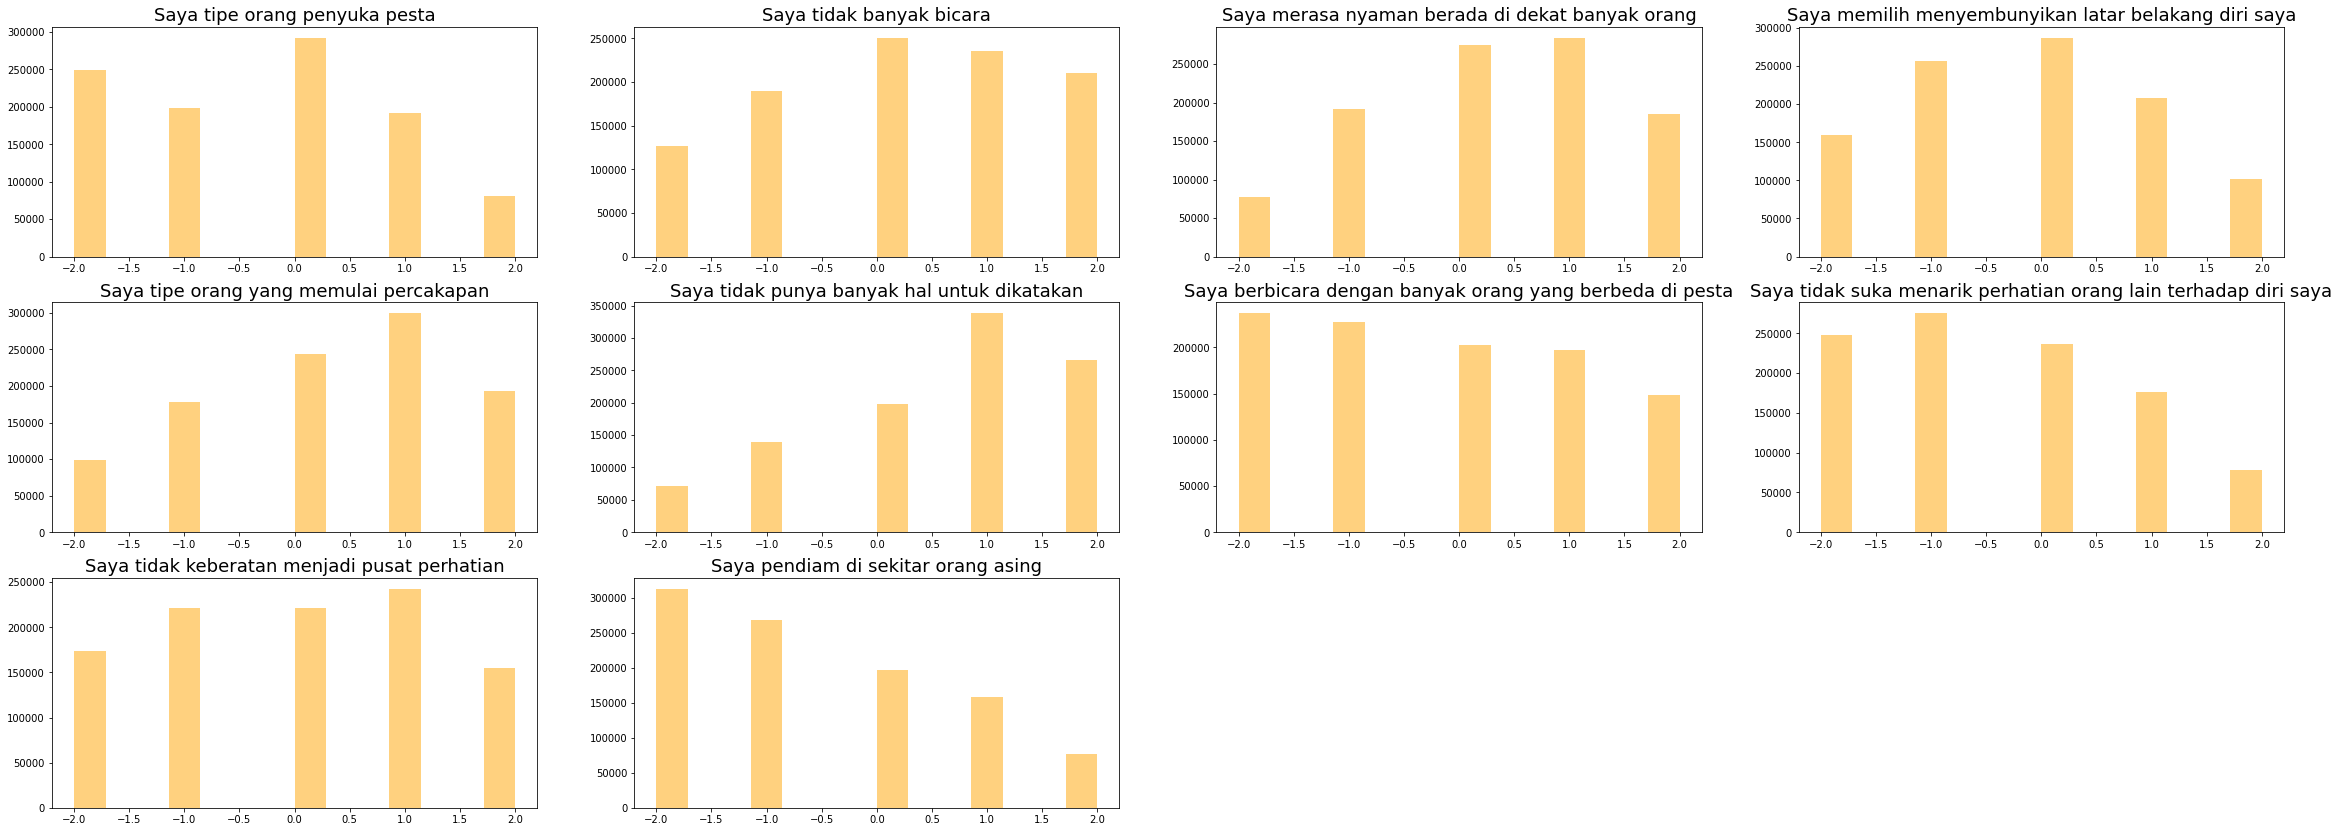

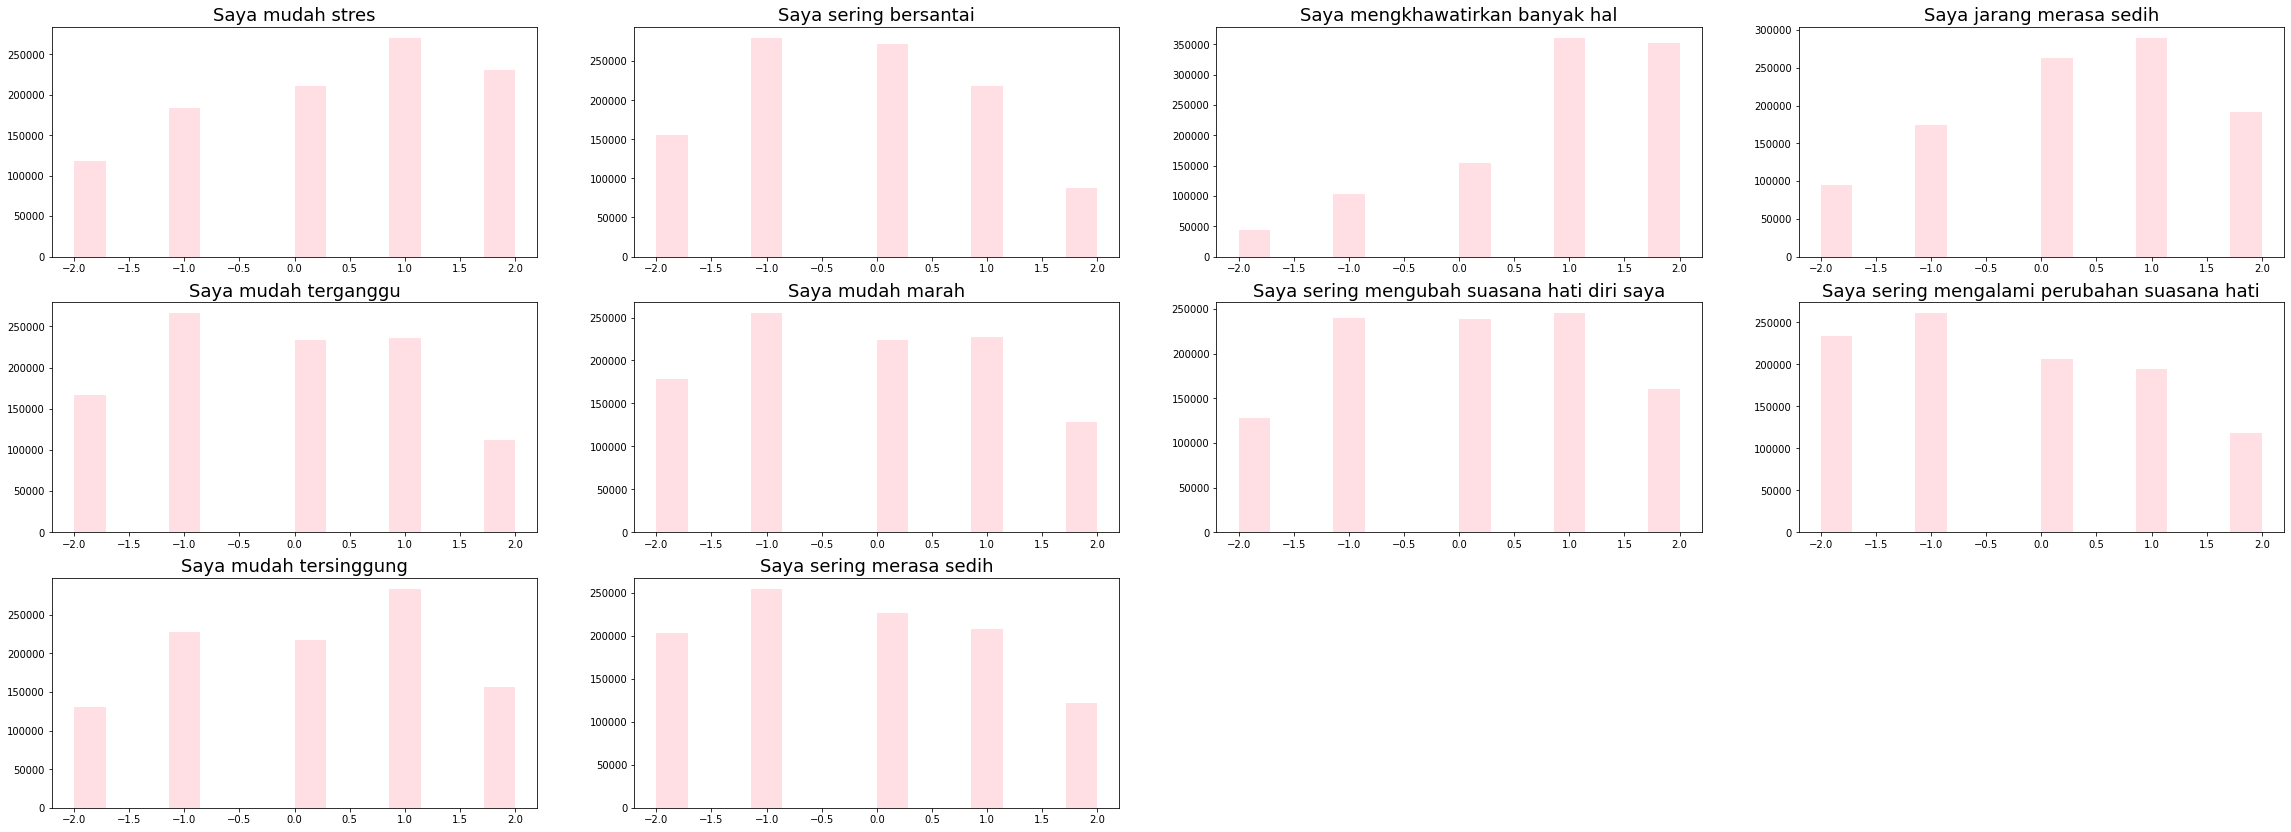

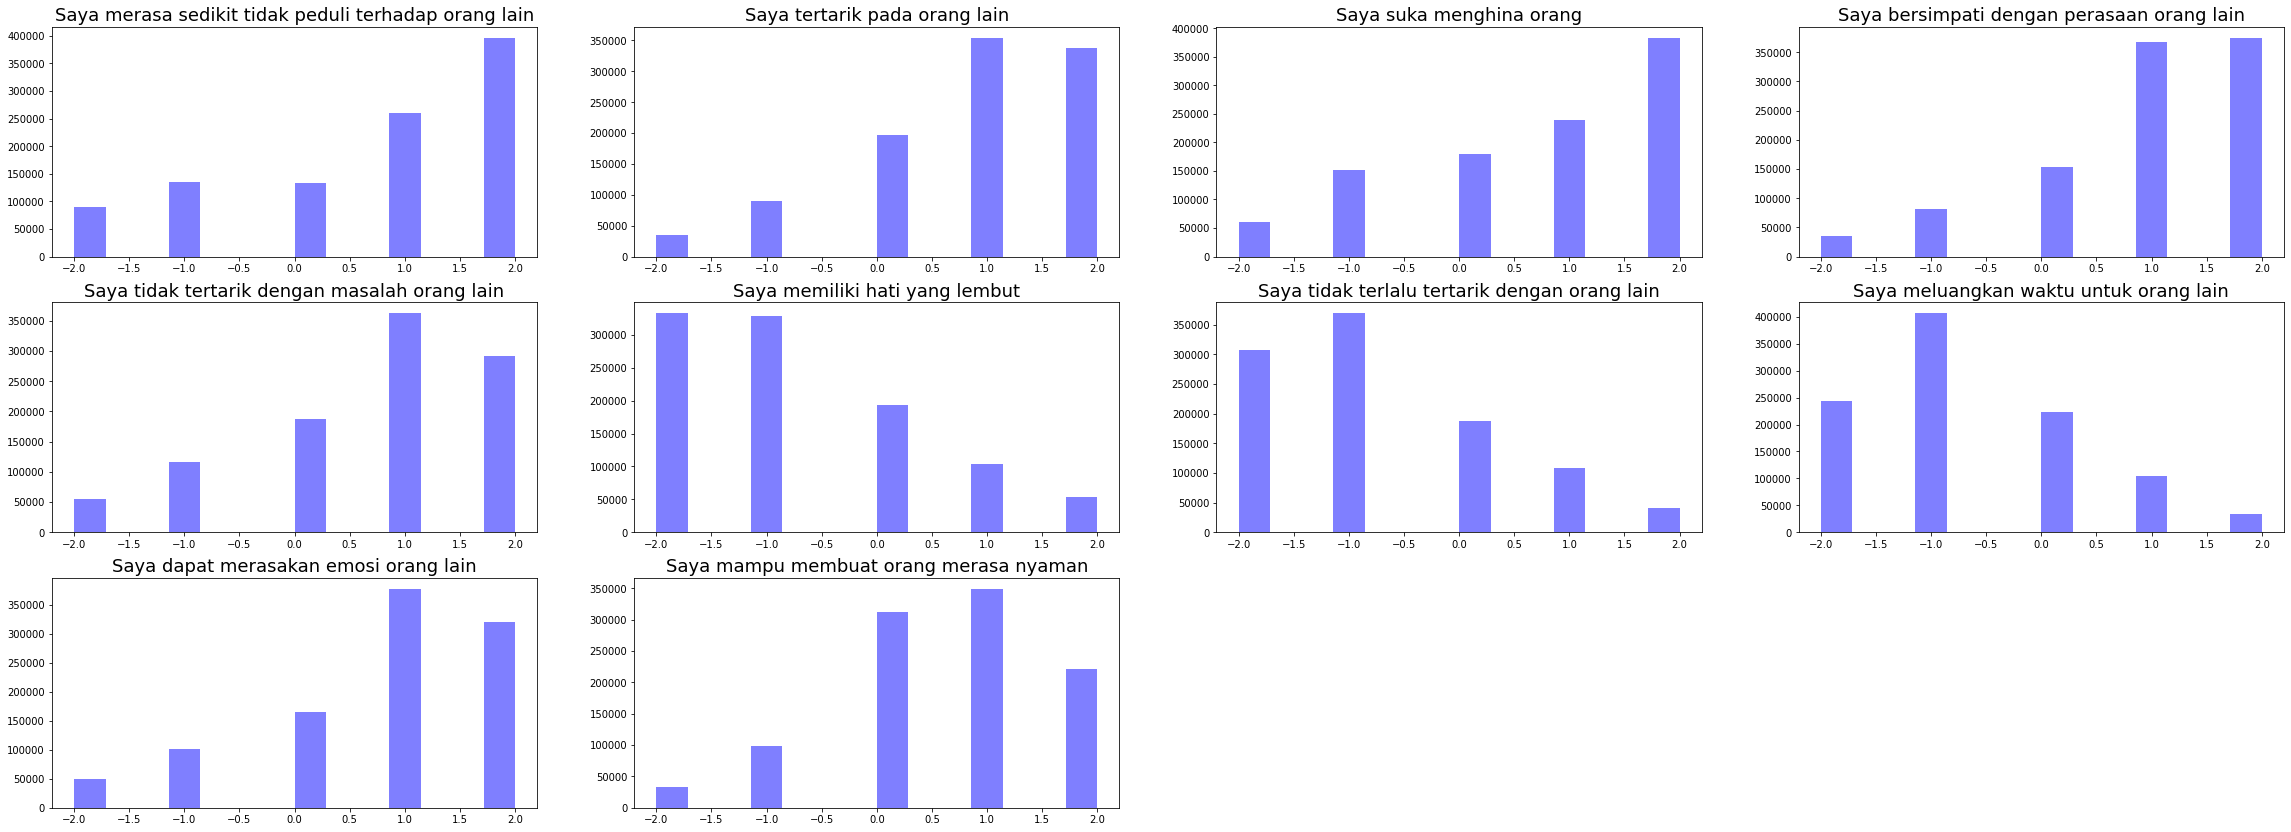

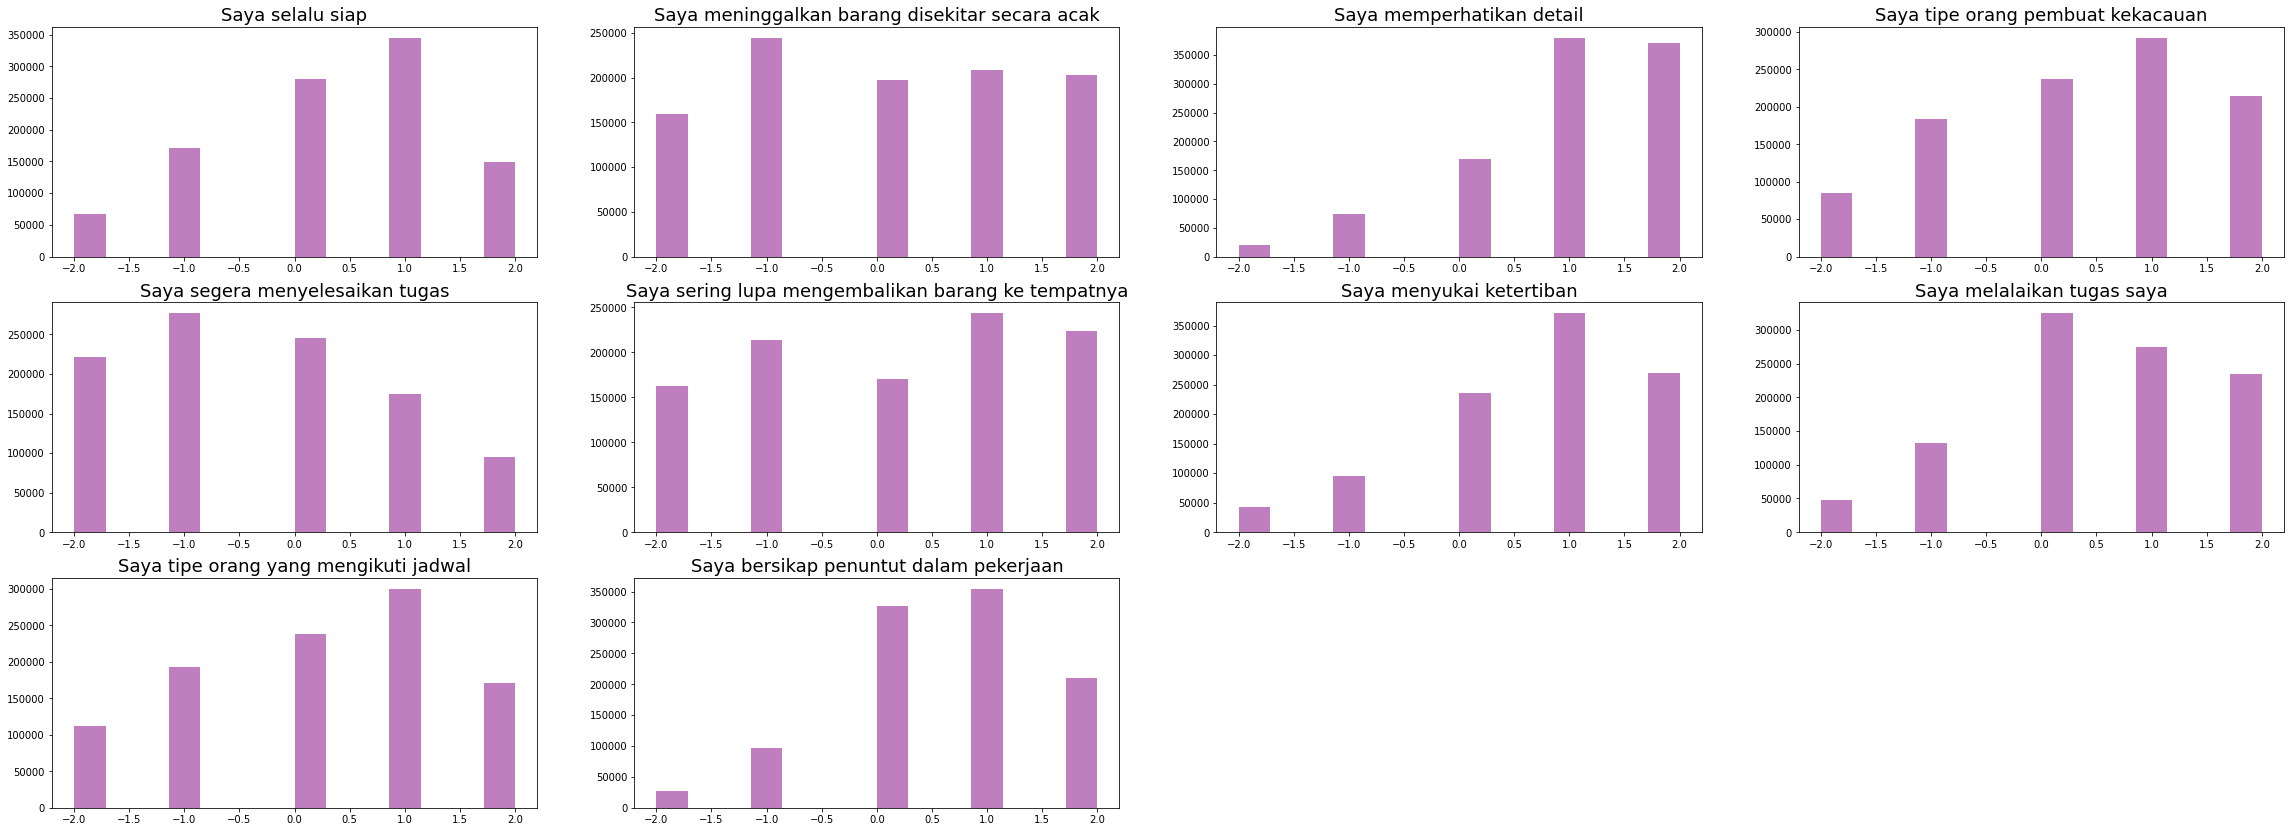

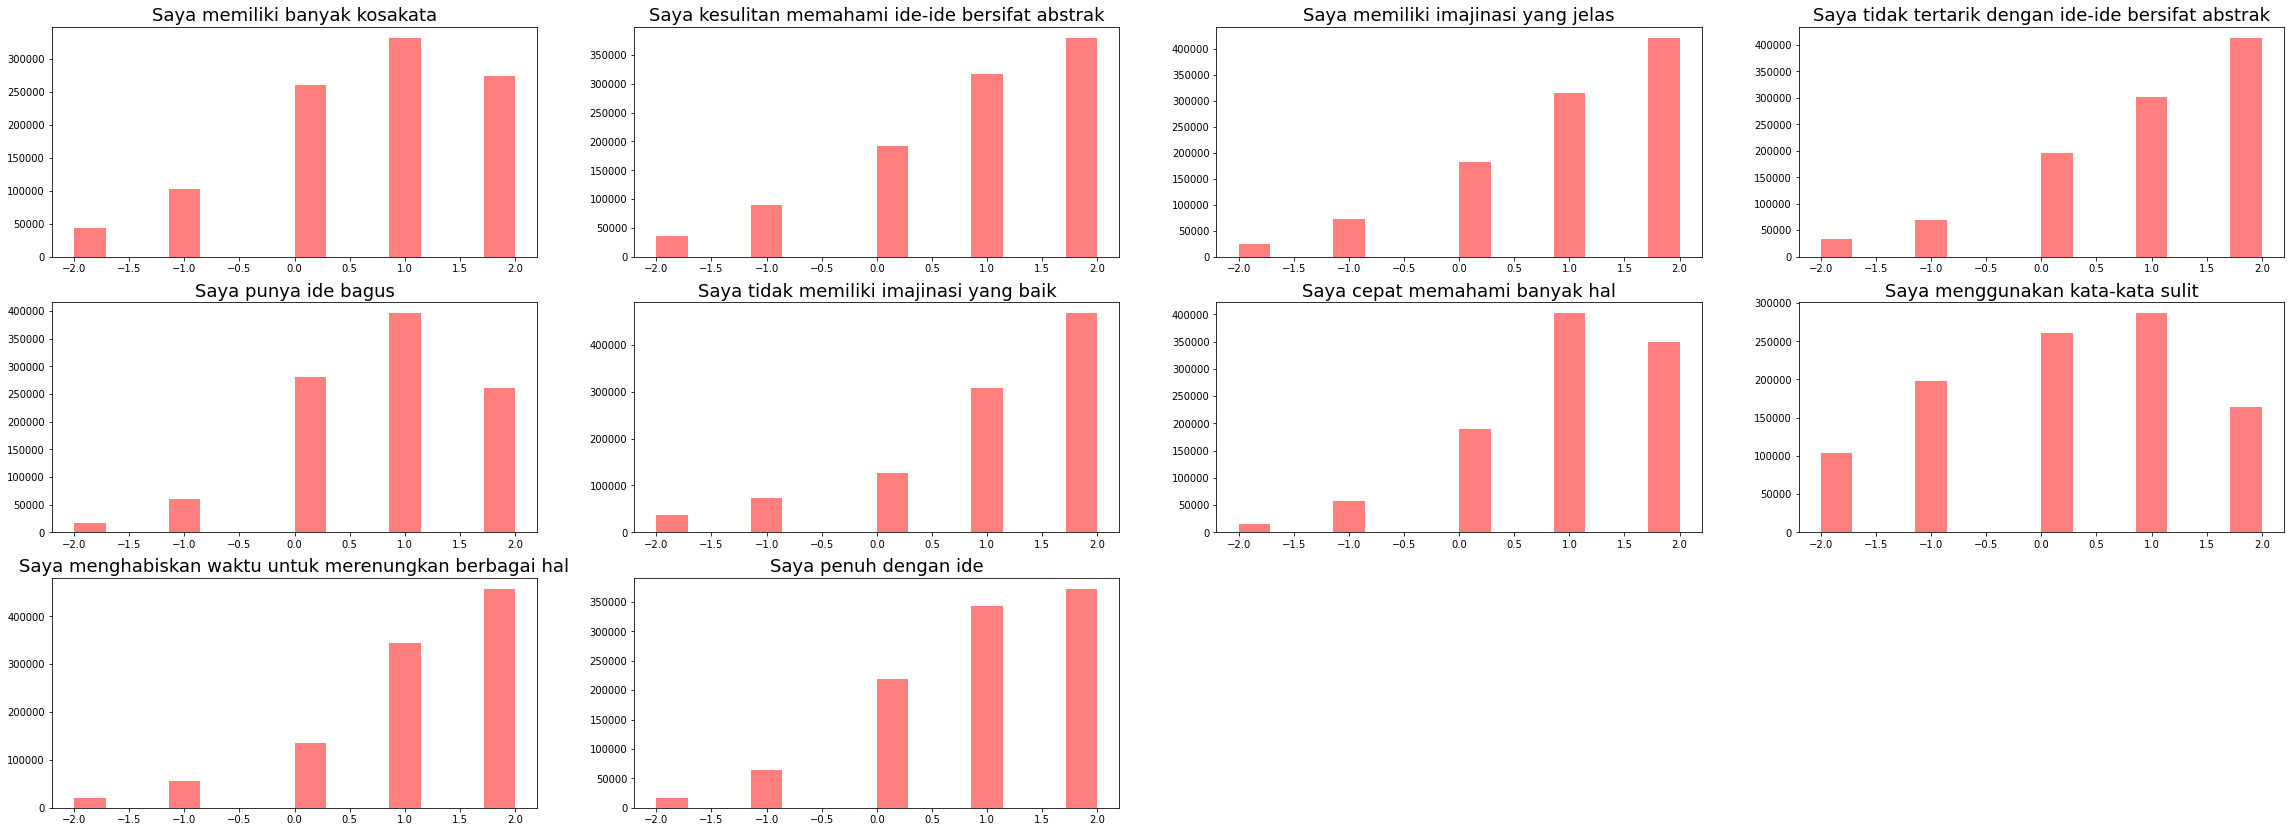

In [21]:
# 10 Pertanyaan terkait extroversion
visualisasi_pertanyaan(EXT, pertanyaan_ext, 'orange')
# 10 Pertanyaan terkait neuroticism
visualisasi_pertanyaan(EST, pertanyaan_est, 'pink')
# 10 Pertanyaan terkait agreeableness
visualisasi_pertanyaan(AGR, pertanyaan_agr, 'blue')
# 10 Pertanyaan terkait conscientiousness
visualisasi_pertanyaan(CSN, pertanyaan_csn, 'purple')
# 10 Pertanyaan terkait openness
visualisasi_pertanyaan(OPN, pertanyaan_opn, 'red')

## Visualisasi Model

In [22]:
df_test = df.iloc[0].to_frame().T

In [23]:
df_test

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,...,2.0,2.0,1.0,2.0,1.0,2.0,2.0,0.0,1.0,2.0


In [24]:
# Menjumlahkan pertanyaan kelompok pada df_test2
col_list = list(df_test)
ext = col_list[0:10]
est = col_list[10:20]
agr = col_list[20:30]
csn = col_list[30:40]
opn = col_list[40:50]

In [25]:
df_total = pd.DataFrame()
df_total['openness'] = (df_test[opn].sum(axis=1)/10) + 3
df_total['conscientiousness'] = (df_test[csn].sum(axis=1)/10) + 3
df_total['extroversion'] = (df_test[ext].sum(axis=1)/10) + 3
df_total['agreeableness'] = (df_test[agr].sum(axis=1)/10) + 3
df_total['neuroticism'] = (df_test[est].sum(axis=1)/10) + 3

In [26]:
df_total

,openness,conscientiousness,extroversion,agreeableness,neuroticism
0,4.5,3.2,4.6,3.5,2.4


(0.0, 5.0)

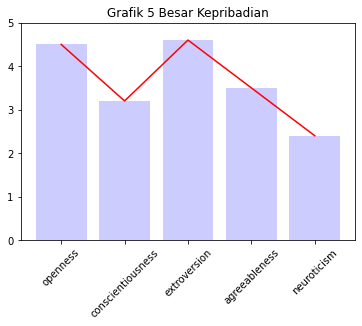

In [27]:
plt.bar(df_total.columns, df_total.iloc[0,:], color='blue', alpha=0.2)
plt.plot(df_total.columns, df_total.iloc[0,:], color='red')
plt.title('Grafik 5 Besar Kepribadian')
plt.xticks(rotation=45)
plt.ylim(0,5)

(0.0, 5.0)

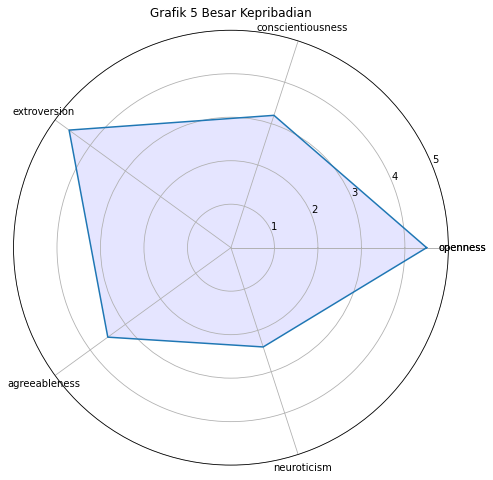

In [28]:
categories = df_total.columns
categories = np.concatenate((categories, [categories[0]]))
values = list(df_total.values)
values = np.concatenate(values)
values = np.concatenate((values, [values[0]]))

label = np.linspace(start=0, stop=2*np.pi, num=len(values))

plt.figure(figsize=(8,8))
plt.subplot(polar=True)

plt.plot(label, values)
plt.fill(label, values, 'blue', alpha=0.1)

lines, tables = plt.thetagrids(np.degrees(label), labels=categories)
plt.title("Grafik 5 Besar Kepribadian")
plt.ylim(0,5)

In [29]:
df_total

,openness,conscientiousness,extroversion,agreeableness,neuroticism
0,4.5,3.2,4.6,3.5,2.4


In [30]:
mbti = []

if df_total['extroversion'].values >= 2.5:
    mbti.append('E')
else:
    mbti.append('I')
    
if df_total['openness'].values >= 2.5:
    mbti.append('N')
else:
    mbti.append('S')
    
if df_total['conscientiousness'].values >= 2.5:
    mbti.append('F')
else:
    mbti.append('T')
    
if df_total['agreeableness'].values >= 2.5:
    mbti.append('J')
else:
    mbti.append('P')
    
if df_total['neuroticism'].values >= 2.5:
    mbti.append('-A')
else:
    mbti.append('-T')

In [31]:
mbti = "".join(mbti)

https://rencanamu.id/post/persiapan-kuliah/mencari-program-studi-yang-sesuai-dengan-kepribadian-mbti-bagian-2

In [32]:
df_total.columns

Index(['openness', 'conscientiousness', 'extroversion', 'agreeableness',
       'neuroticism'],
      dtype='object')

In [33]:
if df_total.openness.values > 3:
    print("Berdasarkan nilai opennessmu, kamu cenderung memiliki sifat \
yang terbuka terhadap cara berpikir baru dan mau \
menerima konsep-konsep baru. Umumnya keputusan yang kamu \
ambil tidak konservatif")
else:
    print("Berdasarkan nilai opennessmu, kamu cenderung memiliki sifat \
yang kurang inovatif, tetapi kelebihan dirimu terletak pada \
kekonsistenanmu. Kamu cenderung bersikap praktis dan cenderung \
tertutup")
    
print('\n')
    
if df_total.conscientiousness.values > 3:
    print("Berdasarkan nilai conscientiousnessmu, kamu cenderung memiliki sifat \
suka bekerja keras dan memiliki tenggat target yang terencana, kamu cenderung \
rajin dan cermat dalam melakukan segala hal")
else:
    print("Berdasarkan nilai conscientiousnessmu, kamu cenderung memiliki sifat \
yang kurang rajin dan terkesan ceroboh, jika kamu masih memiliki sifat ini \
mungkin ada baiknya kamu melakukan introspeksi diri supaya menjadi pribadi \
lebih baik di masyarakat")
    
print("\n")

if df_total.extroversion.values > 3:
    print("Berdasarkan nilai extroversionmu kamu cenderung masuk ke dalam \
karakter extrovert, dimana kamu lebih suka berkumpul dengan orang lain untuk \
melakukan interaksi ataupun aktivitas lainnya")
else:
    print("Berdasarkan nilai extroversionmu kamu cenderung masuk ke dalam \
karakter introvert, dimana kamu lebih cenderung tertutup dan hanya memiliki \
hubungan terbatas pada beberapa orang saja")

print("\n")

if df_total.agreeableness.values > 3:
    print("Berdasarkan nilai agreeableness yang kamu miliki, dirimu \
cenderung bersifat bersifat positif dan menghargai nilai orang lain, \
dirimu juga suka menolong orang lain")
else:
    print("Berdasarkan nilai agreeableness yang kamu miliki, dirimu \
cenderung bersifat teguh pada pendirian dan lebih mementingkan diri sendiri \
hal ini tidak selalu buruk, tetapi sebagai pemilik sifat ini kamu mungkin perlu \
untuk mulai memperbaiki diri dengan mendengarkan orang lain")
    
print("\n")

if df_total.neuroticism.values > 3:
    print("Berdasarkan nilai neuroticism yang kamu miliki, dirimu \
mungkin sering merasa tidak beruntung apabila dibandingkan terhadap \
dunia luar, hal ini dikarenakan sifat neuroticism yang kamu miliki\
membuat kondisi emosimu kurang stabil")
else:
    print("Berdasarkan nilai neuroticism yang kamu miliki, dirimu \
cenderung memiliki kestabilan emosi yang baik sehingga tidak mudah stres")

Berdasarkan nilai opennessmu, kamu cenderung memiliki sifat yang terbuka terhadap cara berpikir baru dan mau menerima konsep-konsep baru. Umumnya keputusan yang kamu ambil tidak konservatif


Berdasarkan nilai conscientiousnessmu, kamu cenderung memiliki sifat suka bekerja keras dan memiliki tenggat target yang terencana, kamu cenderung rajin dan cermat dalam melakukan segala hal


Berdasarkan nilai extroversionmu kamu cenderung masuk ke dalam karakter extrovert, dimana kamu lebih suka berkumpul dengan orang lain untuk melakukan interaksi ataupun aktivitas lainnya


Berdasarkan nilai agreeableness yang kamu miliki, dirimu cenderung bersifat bersifat positif dan menghargai nilai orang lain, dirimu juga suka menolong orang lain


Berdasarkan nilai neuroticism yang kamu miliki, dirimu cenderung memiliki kestabilan emosi yang baik sehingga tidak mudah stres


In [34]:
if mbti == 'ISTJ-A' or mbti == 'ISTJ-T':
    print("Program studi yang sesuai denganmu ialah Manajemen, Pendidikan Kepolisian, Ilmu Hukum, Kedokteran, Akuntansi  dan Sistem Informasi (Manajemen Informatika).")
elif mbti == 'ISFJ-A' or mbti == 'ISFJ-T':
    print("Program studi yang sesuai denganmu ialah Arsitektur , Ilmu Keperawatan, Administrasi Perkantoran (Kesekretariatan), Pendidikan Bimbingan Konseling dan Ilmu Perpustakaan.")
elif mbti == 'ESTJ-A' or mbti == 'ESTJ-T':
    print("Program studi yang sesuai denganmu ialah Pendidikan Militer, akademi polisi, ilmu hukum, akuntansi dan Ekonomi.")
elif mbti == 'ESFJ-A' or mbti == 'ESFJ-T':
    print("Program studi yang sesuai denganmu ialah finance, Ilmu Keperawatan, Pendidikan Bimbingan Konseling dan kesekretariatan.")
elif mbti == 'ISTP-A' or mbti == 'ISTP-T':
    print("Program studi yang sesuai denganmu ialah Kriminologi, Teknik Informatika, teknik, Penerbang (Pendidikan Pilot) dan Ilmu Keolahragaan.")
elif mbti == 'ISFP-A' or mbti == 'ISFP-T':
    print("Program studi yang sesuai denganmu ialah desain, Seni Rupa (Creative Arts), Psikologi, bimbingan konseling dan pendidikan guru.")
elif mbti == 'ESTP-A' or mbti == 'ESTP-T':
    print("Program studi yang sesuai denganmu ialah Manajemen Pemasaran (Marketing), bisnis dan ilmu ekonomi.")
elif mbti == 'ESFP-A' or mbti == 'ESFP-T':
    print("Program studi yang sesuai denganmu ialah Manajemen Perhotelan, Pariwisata, seni rupa dan desain.")
elif mbti == 'INTJ-A' or mbti == 'INTJ-T':
    print("Program studi yang sesuai denganmu ialah ilmu-ilmu eksak seperti matematika, fisika, kimia dan sebagainya. Selain itu, kamu juga cocok dalam program studi Arsitektur, teknik dan Statistika.")
elif mbti == 'ENTJ-A' or mbti == 'ENTJ-T':
    print("Program studi yang sesuai untukmu ialah Ilmu Hukum, Ilmu Komunikasi , Manajemen  dan bisnis.")
elif mbti == 'INTP-A' or mbti == 'INTP-T':
    print("Program studi yang sesuai untukmu ialah ilmu sains, Filsafat, Ilmu Hukum, Psikologi dan juga Arsitektur.")
elif mbti == 'ENTP-A' or mbti == 'ENTP-T':
    print("Program studi yang sesuai untukmu ialah Ilmu Hukum, Manajemen Pemasaran (Marketing) dan konsultan.")
elif mbti == 'INFJ-A' or mbti == 'INFJ-T':
    print("Program studi yang sesuai untukmu ialah pendidikan guru, Psikologi, Pendidikan Dokter dan juga Pendidikan Bimbingan Konseling.")
elif mbti == 'INFP-A' or mbti == 'INFP-T':
    print("Program studi yang sesuai untukmu ialah Jurnalistik, sastra, pendidikan, Seni Rupa (Creative Arts) dan agama.")
elif mbti == 'ENFJ-A' or mbti == 'ENFJ-T':
    print("Program studi yang sesuai denganmu ialah Akuntansi, Ilmu Keperawatan, Pendidikan Bimbingan Konseling  dan Administrasi Perkantoran (Kesekretariatan)")
elif mbti == 'ENFP-A' or mbti == 'ENFP-T':
    print("Program studi yang sesuai dengan kepribadianmu adalah Ilmu Komunikasi, Psikologi, Pendidilkan, Hubungan Internasional, Jurnalistik  dan Hubungan Masyarakat.")

Program studi yang sesuai denganmu ialah Akuntansi, Ilmu Keperawatan, Pendidikan Bimbingan Konseling  dan Administrasi Perkantoran (Kesekretariatan)
